# Estimation of COVID-19 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

### Load datasets

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

### Analyse infected dataset

In [3]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263


In [6]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [7]:
infected[infected['Country/Region']=='China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,1225,1226,1230,1236,1240,1247,1258,1267,1274,1282
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,611,611,611,611,611,611,611,611,611,611
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,1441,1442,1443,1444,1444,1446,1450,1451,1453,1453
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,356,356,356,356,356,356,356,356,356,356
63,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,3640,3657,3675,3684,3689,3703,3710,3718,3724,3726
64,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,683,687,688,690,690,691,693,694,695,700
65,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,160,160,160,160,160,160,160,160,160,160
66,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,190,190,190,190,190,190,190,190,190,190
67,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,1458,1458,1458,1458,1458,1458,1458,1458,1461,1463


### Analyse recovered dataset

In [4]:
recovered = pd.read_csv(recovered_dataset_url)
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analyse deaths dataset

In [5]:
deaths = pd.read_csv(deaths_dataset_url)
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7378,7379,7381,7383,7386,7386,7390,7390,7393,7393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3265,3269,3271,3277,3283,3286,3292,3297,3305,3305
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6404,6412,6423,6435,6443,6453,6468,6481,6495,6508
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,142,142,142,142,142,144,144,144,144,144
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1857,1863,1866,1870,1877,1881,1884,1886,1888,1888


### Pre-processing the data

We are not interested in breaking countries down to further territories, thus we would first get rid of this breakdown and add information on all territories together, to get info for the whole country. This can be done using groupby

In [8]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263


You can see that due to using groupby all DataFrames are now indexed by Country/Region. We can thus access the data for a specific country by using .loc

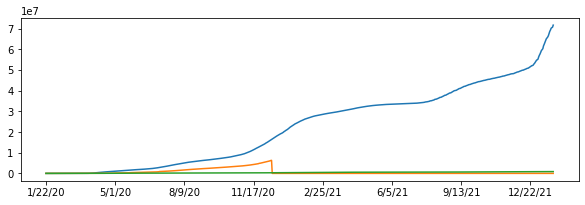

In [10]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
deaths.loc['US'][2:].plot()
plt.show()

Drop **Lat** and **Long** columns from all the datasets 

In [12]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

### Investigate specific contries

In [13]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

,infected,recovered,deaths
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0
...,...,...,...
2022-01-20,69329860,0,862554
2022-01-21,70209840,0,865657
2022-01-22,70495874,0,866470
2022-01-23,70700678,0,867042


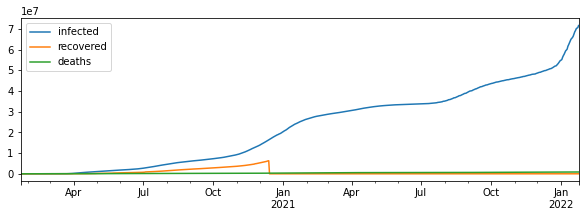

In [14]:
df.plot()
plt.show()

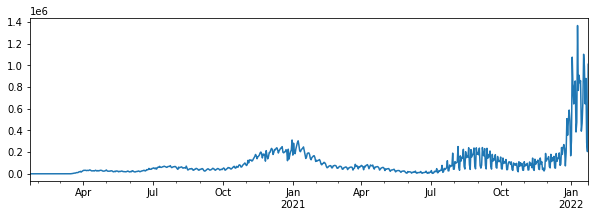

In [15]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

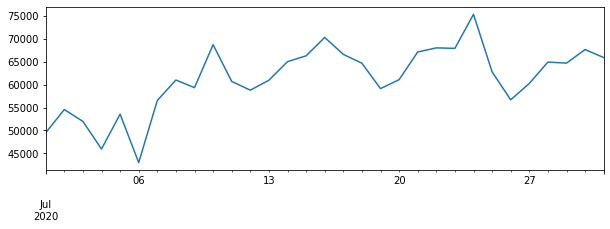

In [16]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

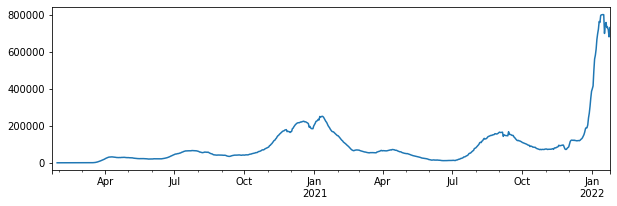

In [17]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

In [18]:
countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4210,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4211,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4212,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4213,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [19]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
809,840,US,USA,840.0,NaN,NaN,NaN,US,40.0,-100.0,US,329466283.0


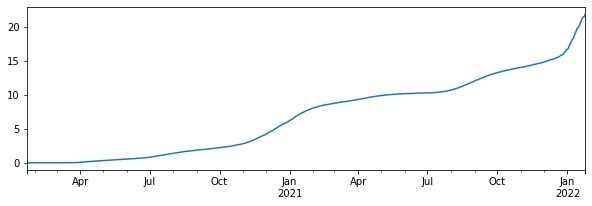

In [20]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

### Computing Rt

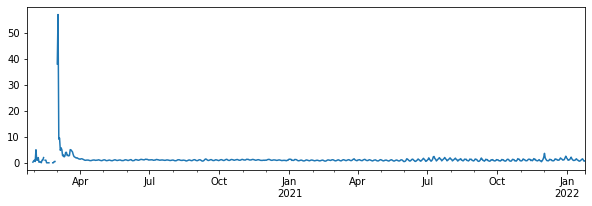

In [21]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

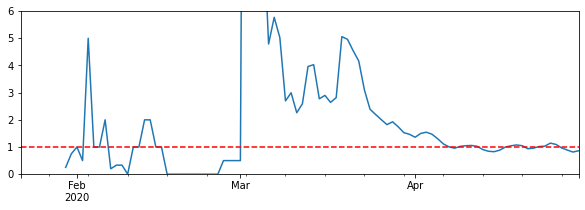

In [22]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

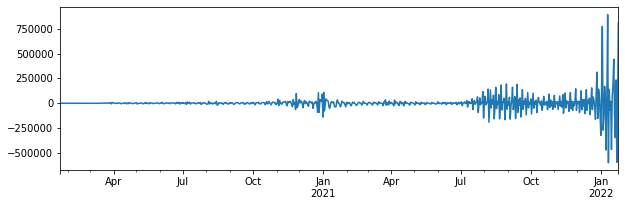

In [23]:
df['ninfected'].diff().plot()
plt.show()

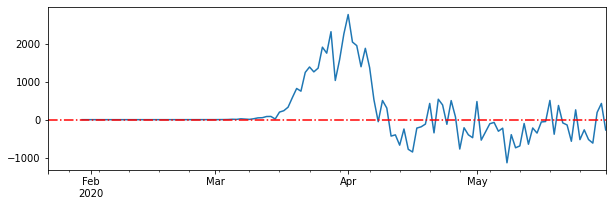

In [24]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

In [ ]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()